In [1]:
import copy
import random
#import json
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blank_cube = '''
        XXX
        XXX
        XXX
XXX XXX XXX XXX
XXX XXX XXX XXX
XXX XXX XXX XXX
        XXX
        XXX
        XXX
'''

In [3]:
SOLVED_STATE = {
    'A' : 'A',
    'B' : 'B',
    'C' : 'C',
    'D' : 'D',

    'E' : 'E',
    'F' : 'F',
    'G' : 'G',
    'H' : 'H',

    'I' : 'I',
    'J' : 'J',
    'K' : 'K',
    'L' : 'L',

    'M' : 'M',
    'N' : 'N',
    'O' : 'O',
    'P' : 'P',

    'Q' : 'Q',
    'R' : 'R',
    'S' : 'S',
    'T' : 'T',

    'U' : 'U',
    'V' : 'V',
    'W' : 'W',
    'X' : 'X'
}

SOLVED_CUBE = {
    'edges' : copy.deepcopy(SOLVED_STATE),
    'corners' : copy.deepcopy(SOLVED_STATE)
}

In [4]:
# operations
def cycle_four_edges(cube, new_cube, to_cycle):
    new_cube['edges'][to_cycle[0]] = cube['edges'][to_cycle[3]]
    new_cube['edges'][to_cycle[1]] = cube['edges'][to_cycle[0]]
    new_cube['edges'][to_cycle[2]] = cube['edges'][to_cycle[1]]
    new_cube['edges'][to_cycle[3]] = cube['edges'][to_cycle[2]]
    
    new_cube['edges'][to_cycle[5]] = cube['edges'][to_cycle[8]]
    new_cube['edges'][to_cycle[6]] = cube['edges'][to_cycle[5]]
    new_cube['edges'][to_cycle[7]] = cube['edges'][to_cycle[6]]
    new_cube['edges'][to_cycle[8]] = cube['edges'][to_cycle[7]]

    return

def cycle_four_corners(cube, new_cube, to_cycle):
    new_cube['corners'][to_cycle[0]] = cube['corners'][to_cycle[3]]
    new_cube['corners'][to_cycle[1]] = cube['corners'][to_cycle[0]]
    new_cube['corners'][to_cycle[2]] = cube['corners'][to_cycle[1]]
    new_cube['corners'][to_cycle[3]] = cube['corners'][to_cycle[2]]
    
    new_cube['corners'][to_cycle[5]] = cube['corners'][to_cycle[8]]
    new_cube['corners'][to_cycle[6]] = cube['corners'][to_cycle[5]]
    new_cube['corners'][to_cycle[7]] = cube['corners'][to_cycle[6]]
    new_cube['corners'][to_cycle[8]] = cube['corners'][to_cycle[7]]

    new_cube['corners'][to_cycle[10]] = cube['corners'][to_cycle[13]]
    new_cube['corners'][to_cycle[11]] = cube['corners'][to_cycle[10]]
    new_cube['corners'][to_cycle[12]] = cube['corners'][to_cycle[11]]
    new_cube['corners'][to_cycle[13]] = cube['corners'][to_cycle[12]]

    return

def R_move(cube):
    new_cube = copy.deepcopy(cube)
    cycle_four_edges(cube, new_cube, 'MNOP BTVJ')
    cycle_four_corners(cube, new_cube, 'MNOP BTVJ CQWK')
    return new_cube

def L_move(cube):
    new_cube = copy.deepcopy(cube)
    cycle_four_edges(cube, new_cube, 'EFGH DLXR')
    cycle_four_corners(cube, new_cube, 'EFGH DLXR AIUS')
    return new_cube

def U_move(cube):
    new_cube = copy.deepcopy(cube)
    cycle_four_edges(cube, new_cube, 'ABCD QMIE')
    cycle_four_corners(cube, new_cube, 'ABCD QMIE RNJF')
    return new_cube

def D_move(cube):
    new_cube = copy.deepcopy(cube)
    cycle_four_edges(cube, new_cube, 'UVWX KOSG')
    cycle_four_corners(cube, new_cube, 'UVWX KOSG LPTH')
    return new_cube

def F_move(cube):
    new_cube = copy.deepcopy(cube)
    cycle_four_edges(cube, new_cube, 'IJKL CPUF')
    cycle_four_corners(cube, new_cube, 'IJKL CPUF DMVG')
    return new_cube

def B_move(cube):
    new_cube = copy.deepcopy(cube)
    cycle_four_edges(cube, new_cube, 'QRST AHWN')
    cycle_four_corners(cube, new_cube, 'QRST AHWN BEXO')
    return new_cube

MOVES = {
    'U' : U_move,
    'D' : D_move,
    'R' : R_move,
    'L' : L_move,
    'F' : F_move,
    'B' : B_move,

    'U2' : lambda x : U_move(U_move(x)),
    'D2' : lambda x : D_move(D_move(x)),
    'R2' : lambda x : R_move(R_move(x)),
    'L2' : lambda x : L_move(L_move(x)),
    'F2' : lambda x : F_move(F_move(x)),
    'B2' : lambda x : B_move(B_move(x)),

    "U'" : lambda x : U_move(U_move(U_move(x))),
    "D'" : lambda x : D_move(D_move(D_move(x))),
    "R'" : lambda x : R_move(R_move(R_move(x))),
    "L'" : lambda x : L_move(L_move(L_move(x))),
    "F'" : lambda x : F_move(F_move(F_move(x))),
    "B'" : lambda x : B_move(B_move(B_move(x))),
}

ALL_MOVES = list(MOVES.keys())

In [5]:
def execute_algorithm(cube, algorithm_string):
    new_cube = copy.deepcopy(cube)

    algorithm_list = algorithm_string.split()
    #print(algorithm_list)
    for move in algorithm_list:
        method_for_move = MOVES[move]
        new_cube = method_for_move(new_cube)

    return new_cube

In [6]:
def make_scramble_sequence(scramble_len=50):
    scramble = ''

    most_recent_move = random.choice(ALL_MOVES)
    new_move = random.choice(ALL_MOVES)
    
    for i in range(scramble_len):
        scramble += most_recent_move + ' '
        while new_move[0] == most_recent_move[0]:
            new_move = random.choice(ALL_MOVES)
            
        most_recent_move = new_move
        
    
#     for i in range(scramble_len):
#         one_random_move = random.choice(ALL_MOVES)
#         scramble += one_random_move + ' '

    return scramble

In [7]:
EDGES_DICT = {
    'A' : 'AQ',
    #'B' : 'B',
    'C' : 'CI',
    'D' : 'DE',
    'E' : 'ED',
    'F' : 'FL',
    'G' : 'GX',
    'H' : 'HR',
    'I' : 'IC',
    'J' : 'JP',
    'K' : 'KU',
    'L' : 'LF',
    #'M' : 'M',
    'N' : 'NT',
    'O' : 'OV',
    'P' : 'PJ',
    'Q' : 'QA',
    'R' : 'RH',
    'S' : 'SW',
    'T' : 'TN',
    'U' : 'UK',
    'V' : 'VO',
    'W' : 'WS',
    'X' : 'XG',
}

CORNERS_DICT = { # in clockwise order
    #'A' : 'A',
    'B' : 'BQN',
    'C' : 'CMJ',
    'D' : 'DIF',
    #'E' : 'E',
    'F' : 'FDI',
    'G' : 'GLU',
    'H' : 'HXS',
    'I' : 'IFD',
    'J' : 'JCM',
    'K' : 'KPV',
    'L' : 'LUG',
    'M' : 'MJC',
    'N' : 'NBQ',
    'O' : 'OTW',
    'P' : 'PVK',
    'Q' : 'QNB',
    #'R' : 'R',
    'S' : 'SHX',
    'T' : 'TWO',
    'U' : 'UGL',
    'V' : 'VKP',
    'W' : 'WOT',
    'X' : 'XSH',
}

In [8]:
def swap_two_edges(cube, edge_1, edge_2):
    '''
    For example: swap_two_edges(messy_cube, 'AQ', 'BM')
    '''
    # swaps the piece specified by edge_1 with the piece specified by edge_2.
    # Specifically, we are swapping
    # cube['edges'][edge_1[0]] with cube['edges'][edge_2[0]], and
    # cube['edges'][edge_1[1]] with cube['edges'][edge_2[1]]

    temp_0 = cube['edges'][edge_1[0]]
    temp_1 = cube['edges'][edge_1[1]]

    cube['edges'][edge_1[0]] = cube['edges'][edge_2[0]]
    cube['edges'][edge_1[1]] = cube['edges'][edge_2[1]]

    cube['edges'][edge_2[0]] = temp_0
    cube['edges'][edge_2[1]] = temp_1

    # in theory, we could maybe do
    # temp = cube['edges'][edge_1]
    # cube['edges'][edge_1] = cube['edges'][edge_2]
    # cube['edges'][edge_2] = temp
    # but that is hard to read/understand. The operation of
    # "set the (dict) values associated with this list of keys
    # to this list of values" is not very intuitive


def swap_two_corners(cube, corner_1, corner_2):
    '''
    For example: swap_two_corners(messy_cube, 'DIF', 'CMJ')
    Ordering can be clockwise or counterclockwise, as long as
    it is the same between the two corners.
    '''

    temp_0 = cube['corners'][corner_1[0]]
    temp_1 = cube['corners'][corner_1[1]]
    temp_2 = cube['corners'][corner_1[2]]

    cube['corners'][corner_1[0]] = cube['corners'][corner_2[0]]
    cube['corners'][corner_1[1]] = cube['corners'][corner_2[1]]
    cube['corners'][corner_1[2]] = cube['corners'][corner_2[2]]

    cube['corners'][corner_2[0]] = temp_0
    cube['corners'][corner_2[1]] = temp_1
    cube['corners'][corner_2[2]] = temp_2


def fix_edge_in_buffer(cube):
    buffer = cube['edges']['B']
    piece_in_buffer = EDGES_DICT[buffer]

    new_cube = swap_two_edges(cube, 'BM', piece_in_buffer)


def fix_corner_in_buffer(cube):
    buffer = cube['corners']['E']
    piece_in_buffer = CORNERS_DICT[buffer]

    new_cube = swap_two_corners(cube, 'ERA', piece_in_buffer)

In [9]:
def solve_cube(scrambled_cube):
    new_cube = copy.deepcopy(scrambled_cube)
    solve_string = ''
    #print('\nSolving...')
    edge_count, corner_count = 0, 0
    # solve edges
    while new_cube['edges'] != SOLVED_STATE:
        buffer = new_cube['edges']['B']
        if buffer not in 'BM':
            # let's say buffer == 'A'
            #swap(new_cube, 'BM', 'AQ')

            # if the buffer is NOT the white/red piece, then the buffer is
            # holding a piece that belongs somewhere else. Let's put it where
            # it belongs
            fix_edge_in_buffer(new_cube)
            swap_two_corners(new_cube, 'CMJ', 'BQN')
            solve_string += buffer + ' '
            edge_count += 1
        else:
            # if buffer == 'B' or buffer == 'M' start new cycle
            # specifically, find an unsolved edge and swap with it
            for one_edge in new_cube['edges'].keys():
                if one_edge != new_cube['edges'][one_edge] and one_edge not in 'BM':
                    # then the one_edge is unsolved
                    unsolved_edge_piece = EDGES_DICT[one_edge]
                    swap_two_edges(new_cube, 'BM', unsolved_edge_piece)
                    swap_two_corners(new_cube, 'CMJ', 'BQN')
                    solve_string += '/ ' + one_edge + ' '
                    edge_count += 1
                    break

    solve_string += '\n'

    if edge_count % 2 == 1:
        # parity
        solve_string += 'parity\n'

        # Ra perm
        swap_two_edges(new_cube, 'AQ', 'DE')
        swap_two_corners(new_cube, 'CMJ', 'BQN')

    # solve corners
    while new_cube['corners'] != SOLVED_STATE:
        buffer = new_cube['corners']['E']
        if buffer not in 'AER':
            fix_corner_in_buffer(new_cube)
            swap_two_edges(new_cube, 'AQ', 'DE')
            solve_string += buffer + ' '
            corner_count += 1
        else:
            # new cycle
            for one_corner in new_cube['corners'].keys():
                if one_corner != new_cube['corners'][one_corner] and one_corner not in 'AER':
                    unsolved_corner_piece = CORNERS_DICT[one_corner]
                    swap_two_corners(new_cube, 'ERA', unsolved_corner_piece)
                    swap_two_edges(new_cube, 'AQ', 'DE')
                    solve_string += '/ ' + one_corner + ' '
                    corner_count += 1
                    break

    #return (solve_string, edge_count, corner_count)
    return solve_string

In [12]:
temp_cube = copy.deepcopy(SOLVED_CUBE)

In [13]:
temp_cube

{'edges': {'A': 'A',
  'B': 'B',
  'C': 'C',
  'D': 'D',
  'E': 'E',
  'F': 'F',
  'G': 'G',
  'H': 'H',
  'I': 'I',
  'J': 'J',
  'K': 'K',
  'L': 'L',
  'M': 'M',
  'N': 'N',
  'O': 'O',
  'P': 'P',
  'Q': 'Q',
  'R': 'R',
  'S': 'S',
  'T': 'T',
  'U': 'U',
  'V': 'V',
  'W': 'W',
  'X': 'X'},
 'corners': {'A': 'A',
  'B': 'B',
  'C': 'C',
  'D': 'D',
  'E': 'E',
  'F': 'F',
  'G': 'G',
  'H': 'H',
  'I': 'I',
  'J': 'J',
  'K': 'K',
  'L': 'L',
  'M': 'M',
  'N': 'N',
  'O': 'O',
  'P': 'P',
  'Q': 'Q',
  'R': 'R',
  'S': 'S',
  'T': 'T',
  'U': 'U',
  'V': 'V',
  'W': 'W',
  'X': 'X'}}

In [22]:
def count_solution_halves(solution_string):
    edge_count, corner_count = 0, 0

    temp_string = solution_string.replace('parity', '')
    solution_list = temp_string.split('\n')

    for char in solution_list[0]:
        if char.isalpha():
            edge_count += 1

    for char in solution_list[-1]:
        if char.isalpha():
            corner_count += 1

    return (edge_count, corner_count)

In [23]:
def run_simulation(num_sims=1000, scramble_len=25):
    difficulty_dict = {}

    print(f'Starting simulation... with num_sims={num_sims}')
    for i in range(num_sims):
        scramble = make_scramble_sequence(scramble_len=scramble_len)
        messy_cube = execute_algorithm(SOLVED_CUBE, scramble)
        sol = solve_cube(messy_cube)
        #letters = count_solution(sol)
        letters = count_solution_halves(sol)

        if letters not in difficulty_dict.keys():
            difficulty_dict[letters] = []

        difficulty_dict[letters].append(scramble)

    print('Ending simulation!')
    return difficulty_dict

In [24]:
def print_sim_results(difficulty_dict):
    print(f'min: {min(difficulty_dict.keys())}')
    print(f'max: {max(difficulty_dict.keys())}')

    for i in sorted(difficulty_dict.keys(), key=lambda x : (x[0] + x[1])):
        print(f'Letters = {i[0] + i[1]},    Format = {i},   Count = {len(difficulty_dict[i])}')

In [25]:
# sim_dict = run_simulation(num_sims=500000)
# print_sim_results(sim_dict)

# 50,000 took 3 mins 37 seconds on macbook air laptop
# 500,000 took 36 mins 13 seconds on macbook air laptop

Starting simulation... with num_sims=500000
Ending simulation!
min: (6, 6)
max: (18, 10)
Letters = 12,    Format = (7, 5),   Count = 6
Letters = 12,    Format = (8, 4),   Count = 5
Letters = 12,    Format = (9, 3),   Count = 2
Letters = 12,    Format = (6, 6),   Count = 1
Letters = 14,    Format = (7, 7),   Count = 94
Letters = 14,    Format = (8, 6),   Count = 161
Letters = 14,    Format = (9, 5),   Count = 141
Letters = 14,    Format = (6, 8),   Count = 15
Letters = 14,    Format = (10, 4),   Count = 59
Letters = 14,    Format = (11, 3),   Count = 13
Letters = 14,    Format = (12, 2),   Count = 1
Letters = 16,    Format = (10, 6),   Count = 4217
Letters = 16,    Format = (11, 5),   Count = 1839
Letters = 16,    Format = (9, 7),   Count = 3628
Letters = 16,    Format = (8, 8),   Count = 930
Letters = 16,    Format = (12, 4),   Count = 270
Letters = 16,    Format = (7, 9),   Count = 93
Letters = 16,    Format = (13, 3),   Count = 20
Letters = 16,    Format = (14, 2),   Count = 1
Letter

In [36]:
file = open('scrambles_database_500000.txt', 'wb')
pickle.dump(sim_dict, file)
file.close()

In [42]:
keys_list = sim_dict.keys()

freq_dict = {}

for key in keys_list:
    key_sum = key[0] + key[1]
    
    if key_sum not in freq_dict:
        freq_dict[key_sum] = 0
        
    freq_dict[key_sum] += len(sim_dict[key])
    
freq_dict
to_graph = sorted(list(freq_dict.items()))
to_graph

[(12, 14),
 (14, 484),
 (16, 11001),
 (18, 95731),
 (20, 229107),
 (22, 138619),
 (24, 23769),
 (26, 1251),
 (28, 24)]

/Users/vaughn/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

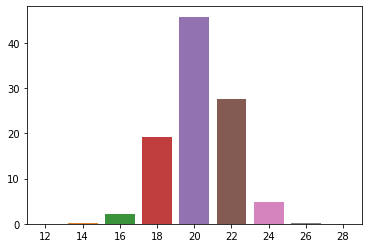

In [43]:
sns.barplot([x[0] for x in to_graph], [x[1] / 5000 for x in to_graph])

In [44]:
def make_baby_scrambles(letters):
    with open('scrambles_database_500000.txt', 'rb') as handle:
        data = handle.read()
    
    pickle_dict = pickle.loads(data)
    keys_list = sim_dict.keys()
    baby_scrambles = []

    for key in keys_list:
        key_sum = key[0] + key[1]
        if key_sum == letters:
            baby_scrambles.extend(pickle_dict[key])
            
    return baby_scrambles

In [45]:
make_baby_scrambles(12)

["R2 B L' F' L U' R U' F L' B2 U' R F R2 L B' R' D L2 R2 L2 U' B U ",
 "B D L R F L2 F U' F' B' D2 B2 F2 L D2 B' U2 R L D F2 U D' U2 D' ",
 "D U' L2 D L2 B U F B F2 B R' L' R L D' L B' D' R2 B D' L' D F ",
 "R' L' F2 R' L D R2 L' U D U' D F' U2 R' D' R U2 F R' D R D' U L ",
 "B' F' B' F' U R2 U' D B R' L F' L2 R2 U2 L' B R2 L' F2 L' R B' R' F ",
 "D2 U2 D U' D2 L' B2 F2 R' U' D L2 R F R2 D2 L2 U F2 D U2 L' D' U' L2 ",
 "D2 F' B2 L D' U R D2 L B R2 D F' R2 L2 F D2 B D F2 R' L D F' D2 ",
 "B' F' U2 D' L B2 F D' F D F' D' R B D L' R2 L' U2 D2 R2 F' U2 L' B ",
 "F D U2 F' L B L' B2 U' B F U' L' R2 F U' F2 B' D' R2 U F2 U2 R' L' ",
 "B' U2 B' U' B2 F L U R' B R F2 B' L' D' B R U2 F2 B2 L B F U R2 ",
 "L' R2 F' D B2 U' D B' U' D R' B F B2 D2 L2 B2 L R' B' F D' L' F' B2 ",
 "B' R' F2 U' D L2 D2 R' B U' L R' L D U' L' R' L' R' L U R' D2 U2 R2 ",
 "B2 R' U2 D L' D2 B' R D F2 L R D2 U R2 U2 L2 R' D2 U L2 D2 R2 U R ",
 "D R2 U' B D B D' U R2 D2 U L' U' R B L' U' B2 L2 D L2 B R' F2 D "]

In [ ]:










# my_cube = copy.deepcopy(SOLVED_CUBE)
# s_cube = execute_algorithm(my_cube, "R U R' U'")
# s_cube_six = execute_algorithm(my_cube, "R U R' U' "*6)

# print(s_cube == SOLVED_CUBE)
# print(s_cube_six == SOLVED_CUBE)







def print_imperfections(cube):
    print('\nCube state:')
    if cube['edges'] != SOLVED_STATE:
        print('edges:')
        for key, val in cube['edges'].items():
            if key != val:
                print(f'{key} : {val}')

    if cube['corners'] != SOLVED_STATE:
        print('corners:')
        for key, val in cube['corners'].items():
            if key != val:
                print(f'{key} : {val}')







def count_solution(solution_string):
    count = 0

    for char in solution_string.replace('parity', ''):
        if char.isalpha():
            count += 1

    return count


def analyze_solution(solution_string):
    letters_count = 0
    analysis_list = []

    solution_list = solution_string.split('\n')
    
    edges_string = solution_list[0]
    edges_string = edges_string.replace(' ', '')
    edge_cycles = edges_string.split('/')

    for cycle in sorted(edge_cycles):
        analysis_list.append(len(cycle))
        letters_count += len(cycle)

    if len(solution_list) == 3:
        analysis_list.append('P')
    else:
        analysis_list.append('|')

    corners_string = solution_list[1]
    corners_string = corners_string.replace(' ', '')
    corner_cycles = corners_string.split('/')

    for cycle in sorted(corner_cycles):
        analysis_list.append(len(cycle))
        letters_count += len(cycle)

    return letters_count, analysis_list


# messy_cube = execute_algorithm(SOLVED_CUBE, "B' D2 B' U2 R2 U R U2 D R L2 B2 R2 L' B L2 B' R' L2 D L2 B2 L' B D'")
# print_imperfections(messy_cube)

# test_ss = solve_cube(messy_cube)
# print(test_ss)
# print(analyze_solution(test_ss))
# print(count_solution(test_ss))














        



# with open('file.txt', 'w') as file:
#      file.write(json.dumps(sim_dict)) # use `json.loads` to do the reverse

# num_sims = 1,000
# 1.3 s / 57 KB

# num_sims = 10,000
# 12.3 s / 573 KB

# num_sims = 100,000
# 122.2 s = ~2 min / 5.7 MB

# num_sims = 1,000,000
# ~20 min / ~57 MB

# cube_4 = copy.deepcopy(SOLVED_CUBE)
# cube_4 = execute_algorithm(cube_4, "R L2 F B' F B' L' B2 F2 L2 ")
# print_imperfections(cube_4)
# print(solve_cube(cube_4))